In [1]:
%matplotlib inline
import matplotlib.pyplot as plot
from IPython.display import display
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import time
import numpy as np
import numpy.random as nr
import pandas as pd
import tensorflow as tf

np.set_printoptions(precision=3, linewidth=100, suppress=True)

In [2]:
data = np.load('../data/boston_housing.npz')
for k, v in data.items():
    print('{}: {}'.format(k, v.shape))
Xtra, ytra = data['Xtra'], data['ytra']
Xval, yval = data['Xval'], data['yval']
M, N = Xtra.shape

yval: (102, 1)
ytra: (404, 1)
Xval: (102, 12)
Xtra: (404, 12)


In [6]:
layer_sizes = [N, 40, 20, 1]
ninp, nh1, nh2, nout = layer_sizes 
n_epochs = 100
batch_size = M
lr = 0.2

In [7]:
tf.reset_default_graph()

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        W = tf.Variable(tf.zeros([n_inputs, n_neurons]), name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        
        Z = tf.matmul(X, W) + b
        if activation == 'sigmoid':
            return tf.nn.sigmoid(Z)
        else:
            return Z

X = tf.placeholder(tf.float32, shape=(None, N), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, nh1, "hidden1", activation="sigmoid")
    hidden2 = neuron_layer(hidden1, nh2, "hidden2", activation="sigmoid")
    output  = neuron_layer(hidden2, nout, "output")

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.square(y - output), name="loss") / 2

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(lr)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    mserr = tf.reduce_mean(tf.square(y - output), name="mserr")

init = tf.global_variables_initializer()


0  Train MSE: 58.9913  Test MSE: 53.2901
10  Train MSE: 28.5647  Test MSE: 21.7618
20  Train MSE: 22.9341  Test MSE: 15.2929
30  Train MSE: 19.9949  Test MSE: 11.834
40  Train MSE: 18.7864  Test MSE: 10.3072
50  Train MSE: 18.2359  Test MSE: 9.69335
60  Train MSE: 17.9174  Test MSE: 9.46379
70  Train MSE: 17.7132  Test MSE: 9.40291
80  Train MSE: 17.5745  Test MSE: 9.41654
90  Train MSE: 17.4752  Test MSE: 9.46131
99  Train MSE: 17.4066  Test MSE: 9.51103

Trained in 0.312008s

MSE: 9.51103

y_hat [ 21.747  15.463  10.428  13.336   9.887   9.996   5.655   8.838  16.974  12.096]
y_val [ 29.05  16.21   9.74   5.5    8.44  13.59   4.61   7.51  17.93  14.36]



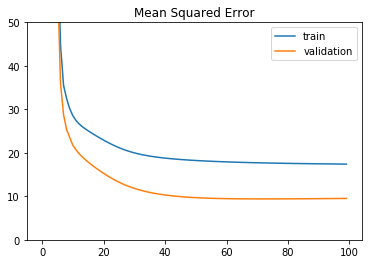

In [8]:
with tf.Session() as sess:
    init.run()
    mse_train = np.empty((n_epochs,), np.float32)
    mse_valid = np.empty((n_epochs,), np.float32)
    t0 = time.time()
    for epoch in range(n_epochs):
        for ii in range(M // batch_size):
            kk = batch_size * ii
            X_batch, y_batch = Xtra[kk:kk+batch_size], ytra[kk:kk+batch_size]
            
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

        mse_train[epoch] = mserr.eval(feed_dict={X: X_batch, y: y_batch})
        mse_valid[epoch] = mserr.eval(feed_dict={X: Xval,    y: yval})
        
        if not epoch % (n_epochs//10):
            print(epoch, " Train MSE:", mse_train[epoch], " Test MSE:", mse_valid[epoch])

    t1 = time.time()
    print(epoch, " Train MSE:", mse_train[epoch], " Test MSE:", mse_valid[epoch])

    print('\nTrained in {:2f}s'.format(t1-t0))
    print()
    yhat = output.eval(feed_dict={X: Xval, y: yval})
    mse = np.square(yhat - yval).mean()
    print('MSE:', mse)
    print()
    print('y_hat', yhat[:10,0])
    print('y_val', yval[:10,0])
    print()
    

plot.plot(mse_train, label='train')
plot.plot(mse_valid, label='validation')
plot.ylim(0, 50)
plot.legend()
plot.title('Mean Squared Error');
